In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, isnan, when
spark = SparkSession.builder.appName('Stock Data').getOrCreate()

Loading file in dataframe

In [2]:
dataset = spark.read.csv('AMZN.csv', inferSchema=True, header=True)

In [3]:
dataset.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [4]:
dataset.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [5]:
dataset.show()

+----------+--------+--------+--------+--------+---------+----------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+----------+--------+--------+--------+--------+---------+----------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|
|1997-05-28| 0.08125|0.081771|0.076563|0.076563| 0.076563|  91488000|
|1997-05-29|0.077083|0.077083|0.073958| 0.07526|  0.07526|  69456000|
|1997-05-30|   0.075|0.075521|0.073958|   0.075|    0.075|  51888000|
|1997-06-02|0.075521

In [6]:
null_checks = [count(when(col(c).isNull(), c)).alias(c) for c in dataset.columns]
dataset.select(null_checks).show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
|   0|   0|   0|  0|    0|        0|     0|
+----+----+----+---+-----+---------+------+



In [7]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [8]:
featureassembler=VectorAssembler(inputCols=["Open", "High", "Low"], outputCol='Features')

In [9]:
output=featureassembler.transform(dataset)

In [10]:
output.show()

+----------+--------+--------+--------+--------+---------+----------+--------------------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|            Features|
+----------+--------+--------+--------+--------+---------+----------+--------------------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|[0.121875,0.125,0...|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|[0.098438,0.09895...|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|[0.088021,0.08854...|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|[0.086458,0.0875,...|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|[0.081771,0.08229...|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|[0.071875,0.07239...|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|[0.070313,0.07604...|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|[0.075521,0.08229...|

In [11]:
output.select(['Features']).show()

+--------------------+
|            Features|
+--------------------+
|[0.121875,0.125,0...|
|[0.098438,0.09895...|
|[0.088021,0.08854...|
|[0.086458,0.0875,...|
|[0.081771,0.08229...|
|[0.071875,0.07239...|
|[0.070313,0.07604...|
|[0.075521,0.08229...|
|[0.08125,0.081771...|
|[0.077083,0.07708...|
|[0.075,0.075521,0...|
|[0.075521,0.07656...|
|[0.076563,0.07656...|
|[0.073958,0.07447...|
|[0.070833,0.07708...|
|[0.075781,0.08541...|
|[0.082813,0.08541...|
|[0.085417,0.08541...|
|[0.079688,0.08020...|
|[0.079167,0.08229...|
+--------------------+
only showing top 20 rows



In [12]:
output.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Features']

In [13]:
final_data=output.select("Date", "Features", "Close").sort("Date", ascending=True)

In [14]:
final_data.show()

+----------+--------------------+--------+
|      Date|            Features|   Close|
+----------+--------------------+--------+
|1997-05-15|[0.121875,0.125,0...|0.097917|
|1997-05-16|[0.098438,0.09895...|0.086458|
|1997-05-19|[0.088021,0.08854...|0.085417|
|1997-05-20|[0.086458,0.0875,...|0.081771|
|1997-05-21|[0.081771,0.08229...|0.071354|
|1997-05-22|[0.071875,0.07239...|0.069792|
|1997-05-23|[0.070313,0.07604...|   0.075|
|1997-05-27|[0.075521,0.08229...|0.079167|
|1997-05-28|[0.08125,0.081771...|0.076563|
|1997-05-29|[0.077083,0.07708...| 0.07526|
|1997-05-30|[0.075,0.075521,0...|   0.075|
|1997-06-02|[0.075521,0.07656...|0.075521|
|1997-06-03|[0.076563,0.07656...|0.073958|
|1997-06-04|[0.073958,0.07447...|0.070833|
|1997-06-05|[0.070833,0.07708...|0.077083|
|1997-06-06|[0.075781,0.08541...|0.082813|
|1997-06-09|[0.082813,0.08541...|0.084375|
|1997-06-10|[0.085417,0.08541...|0.079167|
|1997-06-11|[0.079688,0.08020...|0.077083|
|1997-06-12|[0.079167,0.08229...|0.080208|
+----------

In [15]:
train_data, test_data=final_data.randomSplit([0.75,0.25])
print(f"""There are {train_data.count()} rows in the trainning set,
      and {test_data.count()} in the test set""")

There are 4974 rows in the trainning set,
      and 1740 in the test set


Linear Regression model

In [16]:
from pyspark.ml.regression import LinearRegression

In [17]:
regressor=LinearRegression(featuresCol='Features', labelCol='Close')
lr_model=regressor.fit(train_data)

In [18]:
lr_model.coefficients

DenseVector([-0.6222, 0.8415, 0.7802])

In [19]:
lr_model.intercept

0.008152757635862708

In [20]:
pred=lr_model.transform(test_data)
pred.select("Features", "Close", "Prediction").show()

+--------------------+--------+-------------------+
|            Features|   Close|         Prediction|
+--------------------+--------+-------------------+
|[0.075,0.075521,0...|   0.075|0.08273744019385013|
|[0.079688,0.08020...|0.077083|0.08579686771765538|
|[0.075521,0.07656...|0.075521|0.08410304526787288|
|[0.075781,0.07578...|0.074479|0.08247027247162975|
|[0.075521,0.07994...|0.077083|0.08613837908866005|
|[0.126042,0.12604...|0.114583|0.12193546758405585|
|[0.117188,0.11718...|0.110938|0.11796261138537718|
|[0.121875,0.12187...|0.119792|0.12589821621306624|
|[0.117188,0.12083...|0.120833|0.12468656683256488|
|[0.11875,0.120573...|0.115625|0.12552757484301436|
|[0.108854,0.1125,...|0.107813|0.11778104406904903|
|[0.102604,0.10260...|0.102083| 0.1074506646666642|
|[0.105208,0.10625...| 0.10625|0.11377470285558343|
|[0.118229,0.11875...|0.116927| 0.1251307606738044|
|[0.2,0.233854,0.1...|   0.225|0.23449899412204145|
|[0.232292,0.24062...| 0.21875|0.23351362235735923|
|[0.217188,0

In [21]:
from pyspark.ml.evaluation import RegressionEvaluator

In [22]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="mse")
mse = evaluator.evaluate(pred)
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="r2")
r2 = evaluator_r2.evaluate(pred)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  0.17220151826064053 
r2:  0.999932201467157 



Random Forest Regressor model

In [23]:
from pyspark.ml.regression import RandomForestRegressor

In [24]:
rf=RandomForestRegressor(featuresCol='Features', labelCol='Close')
rf_model=rf.fit(train_data)

In [25]:
pred2=rf_model.transform(test_data)
pred2.select("Features", "Close", "Prediction").show()

+--------------------+--------+------------------+
|            Features|   Close|        Prediction|
+--------------------+--------+------------------+
|[0.075,0.075521,0...|   0.075|0.6639912677550621|
|[0.079688,0.08020...|0.077083|0.6639912677550621|
|[0.075521,0.07656...|0.075521|0.6639912677550621|
|[0.075781,0.07578...|0.074479|0.6639912677550621|
|[0.075521,0.07994...|0.077083|0.6639912677550621|
|[0.126042,0.12604...|0.114583|0.6639912677550621|
|[0.117188,0.11718...|0.110938|0.6639912677550621|
|[0.121875,0.12187...|0.119792|0.6639912677550621|
|[0.117188,0.12083...|0.120833|0.6639912677550621|
|[0.11875,0.120573...|0.115625|0.6639912677550621|
|[0.108854,0.1125,...|0.107813|0.6639912677550621|
|[0.102604,0.10260...|0.102083|0.6639912677550621|
|[0.105208,0.10625...| 0.10625|0.6639912677550621|
|[0.118229,0.11875...|0.116927|0.6639912677550621|
|[0.2,0.233854,0.1...|   0.225|0.6639912677550621|
|[0.232292,0.24062...| 0.21875|0.6639912677550621|
|[0.217188,0.21770...|0.203906|

In [26]:
mse = evaluator.evaluate(pred2)
r2 = evaluator_r2.evaluate(pred2)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  6.40220576043278 
r2:  0.9974793476741616 



Gradient-Boosted Tree Regression

In [27]:
from pyspark.ml.regression import GBTRegressor

In [28]:
gbt = GBTRegressor(featuresCol='Features', labelCol='Close', maxIter=10)
gbt_model = gbt.fit(train_data)

In [29]:
pred3=gbt_model.transform(test_data)
pred3.select("Features", "Close", "Prediction").show(truncate=False)

+----------------------------+--------+------------------+
|Features                    |Close   |Prediction        |
+----------------------------+--------+------------------+
|[0.075,0.075521,0.073958]   |0.075   |0.2911767711443282|
|[0.079688,0.080208,0.076563]|0.077083|0.2911767711443282|
|[0.075521,0.076563,0.075]   |0.075521|0.2911767711443282|
|[0.075781,0.075781,0.073958]|0.074479|0.2911767711443282|
|[0.075521,0.079948,0.073958]|0.077083|0.2911767711443282|
|[0.126042,0.126042,0.110417]|0.114583|0.2911767711443282|
|[0.117188,0.117188,0.107813]|0.110938|0.2911767711443282|
|[0.121875,0.121875,0.116667]|0.119792|0.2911767711443282|
|[0.117188,0.120833,0.1125]  |0.120833|0.2911767711443282|
|[0.11875,0.120573,0.115104] |0.115625|0.2911767711443282|
|[0.108854,0.1125,0.10599]   |0.107813|0.2911767711443282|
|[0.102604,0.102604,0.098438]|0.102083|0.2911767711443282|
|[0.105208,0.10625,0.104688] |0.10625 |0.2911767711443282|
|[0.118229,0.11875,0.116146] |0.116927|0.291176771144328

In [30]:
mse = evaluator.evaluate(pred3)
r2 = evaluator_r2.evaluate(pred3)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  6.504598430037338 
r2:  0.9974390340181428 



Linear Regression model

In [31]:
pandas_df = pred.select("Close", "Prediction").toPandas()

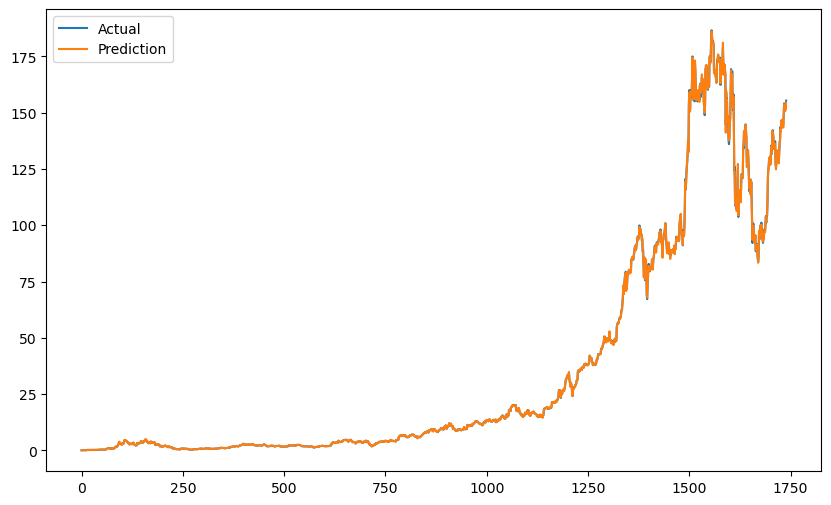

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Close'], label='Actual')
plt.plot(pandas_df['Prediction'], label='Prediction')
plt.legend()
plt.show()

In [39]:
lr_model.write().overwrite().save("G:/avocado")

In [40]:
from pyspark.ml.regression import LinearRegressionModel
lrModel=LinearRegressionModel.load("G:/avocado")
final_output=lrModel.transform(test_data)
final_output.show()

+----------+--------------------+--------+-------------------+
|      Date|            Features|   Close|         prediction|
+----------+--------------------+--------+-------------------+
|1997-05-30|[0.075,0.075521,0...|   0.075|0.08273744019385013|
|1997-06-11|[0.079688,0.08020...|0.077083|0.08579686771765538|
|1997-06-19|[0.075521,0.07656...|0.075521|0.08410304526787288|
|1997-06-27|[0.075781,0.07578...|0.074479|0.08247027247162975|
|1997-06-30|[0.075521,0.07994...|0.077083|0.08613837908866005|
|1997-07-11|[0.126042,0.12604...|0.114583|0.12193546758405585|
|1997-07-17|[0.117188,0.11718...|0.110938|0.11796261138537718|
|1997-07-31|[0.121875,0.12187...|0.119792|0.12589821621306624|
|1997-08-01|[0.117188,0.12083...|0.120833|0.12468656683256488|
|1997-08-04|[0.11875,0.120573...|0.115625|0.12552757484301436|
|1997-08-14|[0.108854,0.1125,...|0.107813|0.11778104406904903|
|1997-08-18|[0.102604,0.10260...|0.102083| 0.1074506646666642|
|1997-08-22|[0.105208,0.10625...| 0.10625|0.11377470285